En los últimos tiempos he estado leyendo en múltiples sitios que mmatplotlib es feo, que se ve viejuno, que la librería *[ponga usted aquí la librería chachiguay que desee]* es 'más mejor', que es una biblioteca muy pesada,..., pero nunca he leído una argumentación para refutar esas quejas.

Hoy me voy a centrar en la primera queja que he indicado más arriba.

# ¿Es matplotlib feo?

Cuando se inició el desarrollo de matplotlib el entorno de trabajo era muy diferente al actual. Se hacían gráficas estáticas 2D para ser publicadas en revistas o en la web de hace 10 o más años (ha cambiado un poco el panorama desde entonces). Se inició para ser una alternativa libre a Matlab y es por ello que su API y apariencia es muy parecida a la que ofrece Matlab. De esta forma matplotlib hace gráficos que, de base, son simples y pensados para ser publicados en cualquier sitio sin necesidad de mucha modificación.

A pesar de ofrecer gráficos aceptables de partida (en mi modesta opinión, por supuesto), desde tiempos inmemoriales se puede acceder a la configuración de base y modificarla para el gusto de cada cual. En la versión más antigua que figura en github (0.91.3) podéis encontrar que [`rcParams` ya está por ahí](https://github.com/matplotlib/matplotlib/blob/v0.91.2/lib/matplotlib/__init__.py#L42) (fichero modificado por última vez en 2007). El que hubiera querido [modificar algo de la configuración básica que trae matplotlib lo podría haber hecho sin mucho esfuerzo](http://matplotlib.org/users/customizing.html) y hubiera tardado menos que el perdido en escribir una queja por alguna lista de correo, entrada en algún blog, comentario en reddit,...(\*) 

(\*) *Ahora con twitter puede que sea más rápido lanzar la queja que modificar eso que tanto te molesta pero seguirá sin haber argumentación, gracias twitter!!*

## ¿Modificar matplotlib a  mi gusto?

Siempre ha sido relativamente sencillo, de hecho, en su momento desde Pybonacci creamos un repositorio con algo de código que te [ofrecía una serie de decoradores para conseguir nuevos estilos de forma sencilla](http://nbviewer.ipython.org/github/Pybonacci/mpl_styles/blob/master/mpl_styles-examples_of_use.ipynb).

Pero desde la versión 1.4 tenemos disponible el [paquete `styles`](http://matplotlib.org/users/whats_new.html#style-package-added) que permite cambiar de estilos fácilmente y que trae algunos estilos por defecto. Veamos un poco como funciona todo esto:

Primero de todo hacemos todo el previo de imports y mostrar versiones y demás para que el que quiera pueda reproducir los ejemplos sin problemas.

In [1]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information

In [2]:
%version_information matplotlib, numpy

/home/kiko/pyprojs/pyenv/scipy/lib/python3.4/site-packages/ipython/IPython/core/formatters.py:250: FormatterWarning: application/json formatter returned invalid type <class 'dict'> (expected (<class 'str'>,)) for object: <version_information.VersionInformation object at 0x7fe3932c19e8>
  FormatterWarning


Software versions
Python 3.4.0 64bit [GCC 4.8.2]
IPython 3.0.0-dev
OS Linux 3.13.0 24 generic x86_64 with LinuxMint 17 qiana
matplotlib 1.4.2
numpy 1.9.1
Sun Jan 25 19:51:49 2015 CET

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

Un gráfico normal por defecto en matplotlib (de esos que son tan feos) en el notebook de IPython será de la siguiente forma:

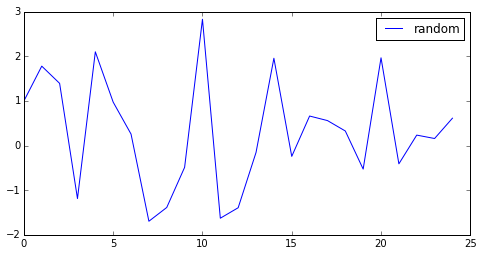

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.random.randn(25), label = 'random')
ax.legend()

Usando el paquete `styles` modificar la apariencia a uno de los estilos que trae por defecto el paquete sería algo como lo siguiente:

Estilos disponibles:  ['fivethirtyeight', 'ggplot', 'grayscale', 'dark_background', 'bmh']
Vamos a usar el estilo  ggplot


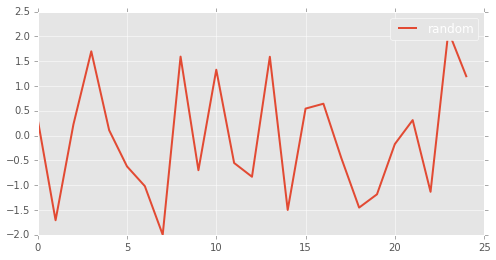

In [9]:
print('Estilos disponibles: ', plt.style.available)
estilo = np.random.choice(plt.style.available)
print('Vamos a usar el estilo ', estilo)
plt.style.use(estilo)

# la misma gráfica que antes
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.random.randn(25), label = 'random')
ax.legend()

Como habéis visto en la salida anterior disponéis de varios estilos por defecto, `['ggplot', 'bmh', 'grayscale', 'dark_background', 'fivethirtyeight']`. Probadlos todos si queréis verlos en vivo o [ved este notebook](http://nbviewer.ipython.org/github/jakevdp/PyData2014/blob/master/notebooks/06_mpl_Stylesheets.ipynb).

Si os gustan los valores por defecto podéis volver a ellos usando `plt.rcdefaults()`.

## No me gusta ninguno de los estilos que vienen por defecto

"Siemprrre negatifffos, nunca positifffos", pero que no cunda el desánimo. Crear tu propio estilo es sencillo. Vamos a ver como podemos crear una hoja de estilos que se adecúe a nuestros gustos.

Si queremos que nuestro nuevo estilo esté siempre disponible cada vez que usemos matplotlib deberemos incluir la hoja de estilos en la carpeta <strike>`~/.matplotlib/stylelib/`</strike> `~/.config/matplotlib/stylelib/` (la documentación oficial está mal y deberéis usar la que os indico yo, quizá esa carpeta no exista de inicio y la deberéis de crear). Voy a crearla con IPython (lo hago en Linux, no lo he probado en otros sistemas operativos):

In [10]:
%mkdir ~/.config # Seguramente esta ya exista
%mkdir ~/.config/matplotlib
%mkdir ~/.config/matplotlib/stylelib

mkdir: cannot create directory ‘/home/kiko/.config’: File exists
mkdir: cannot create directory ‘/home/kiko/.config/matplotlib’: File exists


Y ahora vamos a definir un nuevo estilo **pybonacci** como el que [definimos en el repositorio de *mpl_styles*](https://github.com/Pybonacci/mpl_styles/blob/master/mpl_styles.py#L117). Para ello vamos a usar IPython para crear la hoja de estilo que se llamará `pybonacci.mplstyle` (debe tener la extensión `\*.mplstyle`):

In [11]:
%%writefile ~/.config/matplotlib/stylelib/pybonacci.mplstyle
lines.linewidth: 1.0
lines.color: 5390C1
lines.antialiased: True
patch.linewidth: 0.5
patch.facecolor: FFD333
patch.edgecolor: FFE771
patch.antialiased: True
font.family: Arial
font.size: 10.0
font.monospace: DejaVu Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace
axes.facecolor: eeeeee
axes.edgecolor: bcbcbc
axes.linewidth: 1.0
axes.grid: True
axes.titlesize: x-large
axes.labelsize: large
axes.labelcolor: 555555
axes.axisbelow: True
axes.color_cycle: 5390C1, FFD333, FFE771, 70A4CB, 4385BB, 3D79AA, 39719E
xtick.major.size: 0.0
xtick.minor.size: 0.0
xtick.major.pad: 6.0
xtick.minor.pad: 6.0
xtick.color: 555555
xtick.direction: in
ytick.major.size: 0.0
ytick.minor.size: 0.0
ytick.major.pad: 6.0
ytick.minor.pad: 6.0
ytick.color: 555555
ytick.direction: in
legend.fancybox: True
legend.numpoints: 1
figure.figsize: 11, 8
figure.facecolor: 1.0
figure.edgecolor: 0.5
figure.subplot.hspace: 0.5

Writing /home/kiko/.config/matplotlib/stylelib/pybonacci.mplstyle


Y ahora, supuestamente, deberíamos poder acceder al nuevo estilo creado:

In [12]:
print('Estilos disponibles: ', plt.style.available)

Estilos disponibles:  ['fivethirtyeight', 'ggplot', 'grayscale', 'dark_background', 'bmh']


Si veis que no está disponible podéis hacer lo siguiente:

In [13]:
plt.style.reload_library()
plt.style.available

['ggplot',
 'grayscale',
 'dark_background',
 'bmh',
 'fivethirtyeight',
 'pybonacci']

Ahora vamos a recrear el gráfico que [definimos en el repositorio de *mpl_styles*](https://github.com/Pybonacci/mpl_styles/blob/master/mpl_styles.py#L117) para el estilo **pybo** que definimos allí:

<Container object of 10 artists>

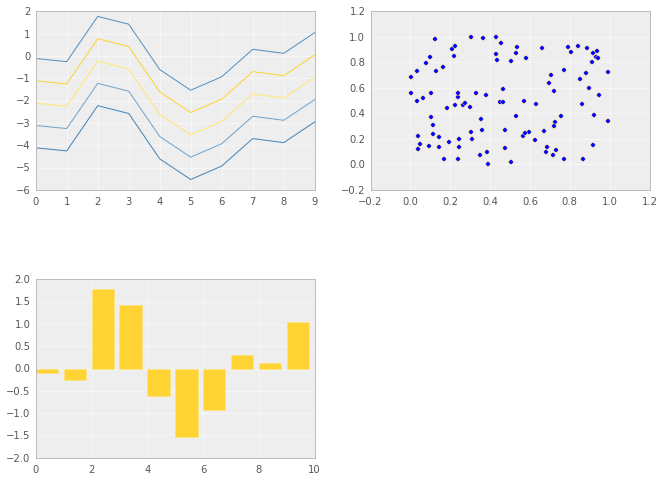

In [16]:
plt.style.use('pybonacci')

x1 = range(10)
x2 = np.random.rand(100)
y1 = np.random.randn(10)
y2 = np.random.rand(100)

plt.subplot(2,2,1)
plt.plot(x1,y1)
plt.plot(x1,y1-1)
plt.plot(x1,y1-2)
plt.plot(x1,y1-3)
plt.plot(x1,y1-4)
plt.subplot(2,2,2)
plt.scatter(x2, y2)
plt.subplot(2,2,3)
plt.bar(x1, y1)

## Que he dicho que no me gusta matplotlib

Si a pesar de todo lo expuesto aquí sigue sin gustarte matplotlib (estás en tu derecho y si lo argumentas en los comentarios lo podré entender mejor) tienes varias posibilidades disponibles:

* [Bokeh](http://bokeh.pydata.org/en/latest/)
* [GGplot](http://ggplot.yhathq.com/)
* Usad alguna librería javascript como Highcharts ([ved un tutorial aquí](http://pybonacci.org/2014/07/31/tutorial-de-highcharts-usando-ipython-brython-y-brythonmagic/)), d3js,...
* [Chaco](http://code.enthought.com/chaco/)
* [Veusz](http://home.gna.org/veusz/)
* [PyQwt](http://pyqwt.sourceforge.net/)

No pongo [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) puesto que se basa en matplotlib.

Saludos a todos.

P.D.: Este notebook y la hoja de estilos que acabamos de crear está disponible en el [repo de notebooks de Pybonacci](https://github.com/Pybonacci/notebooks/tree/master/Realmente_es_feo_matplotlib).